In this notebook we analyze the similarities and differences between taxi services in terms of global peak hours and per day

In [2]:
%matplotlib inline
import geopandas as gpd
import pandas as pd

##  "green_trips"

In [3]:
# cargar base de datos
green_trips = pd.read_csv("Data/green_trips_new_2.csv")

In [4]:
green_trips.head()

,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,total_amount
0,2015-02-01 01:26:45,2015-02-01 01:49:58,-73.953545,40.811172,-73.984764,40.728386,1,8.11,27.8
1,2015-01-02 20:06:28,2015-01-02 20:14:04,-73.946709,40.714321,-73.961571,40.711475,1,1.29,9.8
2,2014-09-27 17:55:38,2014-09-27 18:19:56,-73.957626,40.718094,-73.947304,40.777813,5,6.12,26.3
3,2014-04-27 02:27:04,2014-04-27 02:39:02,-73.949501,40.713997,-73.987785,40.718582,2,3.68,17.3
4,2014-05-26 18:32:19,2014-05-26 18:44:13,-73.944092,40.672195,-73.977325,40.664013,1,2.40,11.5


In [5]:
# agregar columna a base de datos del pickup time formateado
green_trips['format_pickup_datetime'] = pd.to_datetime(green_trips['pickup_datetime'])

In [6]:
green_trips.head()

,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,total_amount,format_pickup_datetime
0,2015-02-01 01:26:45,2015-02-01 01:49:58,-73.953545,40.811172,-73.984764,40.728386,1,8.11,27.8,2015-02-01 01:26:45
1,2015-01-02 20:06:28,2015-01-02 20:14:04,-73.946709,40.714321,-73.961571,40.711475,1,1.29,9.8,2015-01-02 20:06:28
2,2014-09-27 17:55:38,2014-09-27 18:19:56,-73.957626,40.718094,-73.947304,40.777813,5,6.12,26.3,2014-09-27 17:55:38
3,2014-04-27 02:27:04,2014-04-27 02:39:02,-73.949501,40.713997,-73.987785,40.718582,2,3.68,17.3,2014-04-27 02:27:04
4,2014-05-26 18:32:19,2014-05-26 18:44:13,-73.944092,40.672195,-73.977325,40.664013,1,2.40,11.5,2014-05-26 18:32:19


In [7]:
# obtener columna con las horas del pickup time
green_trips_pickup_hour = green_trips["format_pickup_datetime"].dt.hour
green_trips_pickup_hour

0           1
1          20
2          17
3           2
4          18
           ..
3589043     1
3589044    12
3589045     9
3589046    14
3589047    18
Name: format_pickup_datetime, Length: 3589048, dtype: int64

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

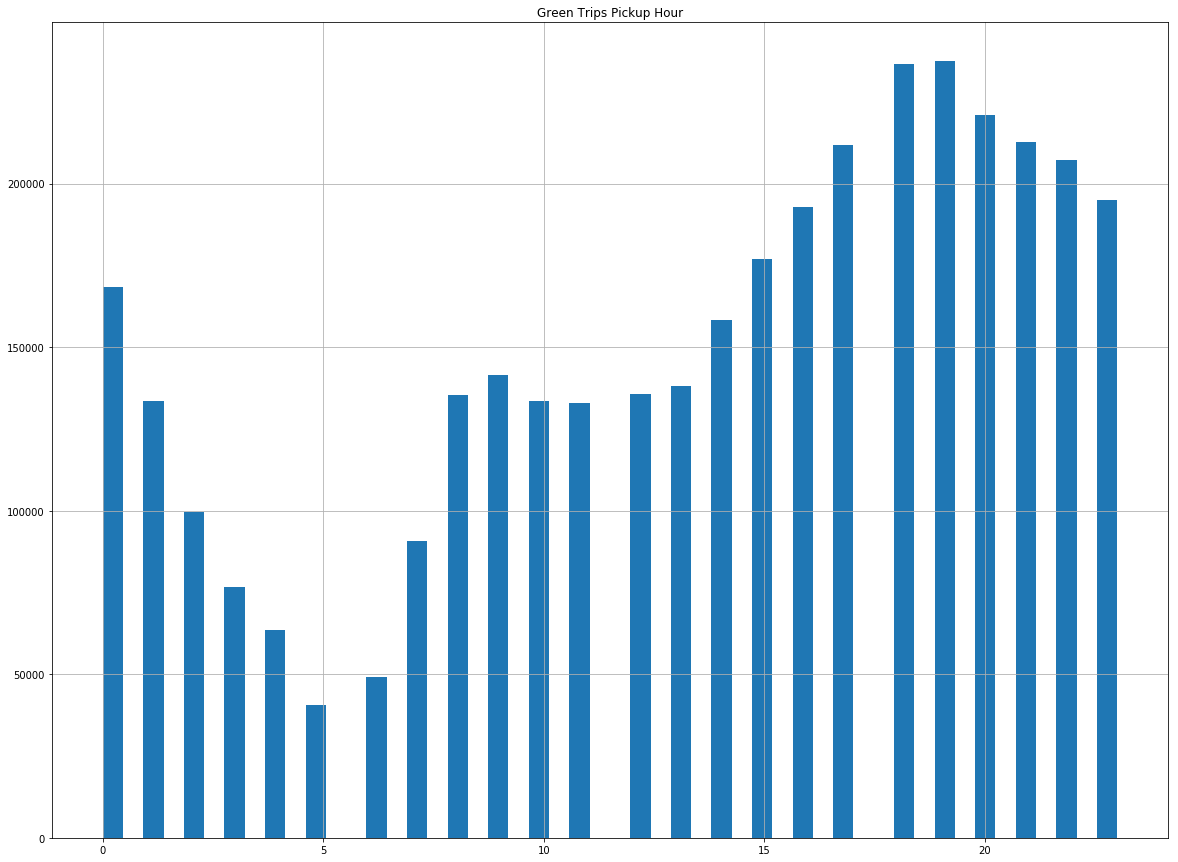

In [9]:
# histograma de las horas del pickup
green_trips_pickup_hour.hist(bins=50, figsize=(20,15))
plt.title("Green Trips Pickup Hour")
plt.rcParams.update({'font.size': 20})
plt.show()

-Global peak hours in green service: 18-19h

-Global valley hours in green service: Early in the morning 5h 

In [10]:
# agregar columna con días de la semana
green_trips['day_of_week'] = green_trips["format_pickup_datetime"].dt.day_name()

In [11]:
green_trips.head()

,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,total_amount,format_pickup_datetime,day_of_week
0,2015-02-01 01:26:45,2015-02-01 01:49:58,-73.953545,40.811172,-73.984764,40.728386,1,8.11,27.8,2015-02-01 01:26:45,Sunday
1,2015-01-02 20:06:28,2015-01-02 20:14:04,-73.946709,40.714321,-73.961571,40.711475,1,1.29,9.8,2015-01-02 20:06:28,Friday
2,2014-09-27 17:55:38,2014-09-27 18:19:56,-73.957626,40.718094,-73.947304,40.777813,5,6.12,26.3,2014-09-27 17:55:38,Saturday
3,2014-04-27 02:27:04,2014-04-27 02:39:02,-73.949501,40.713997,-73.987785,40.718582,2,3.68,17.3,2014-04-27 02:27:04,Sunday
4,2014-05-26 18:32:19,2014-05-26 18:44:13,-73.944092,40.672195,-73.977325,40.664013,1,2.40,11.5,2014-05-26 18:32:19,Monday


In [12]:
# agrupar datos por día de la semana
green_trips_groupedby_day = green_trips.groupby("day_of_week")

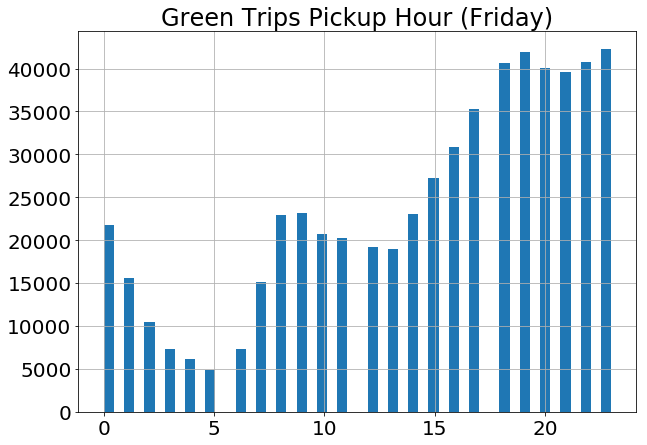

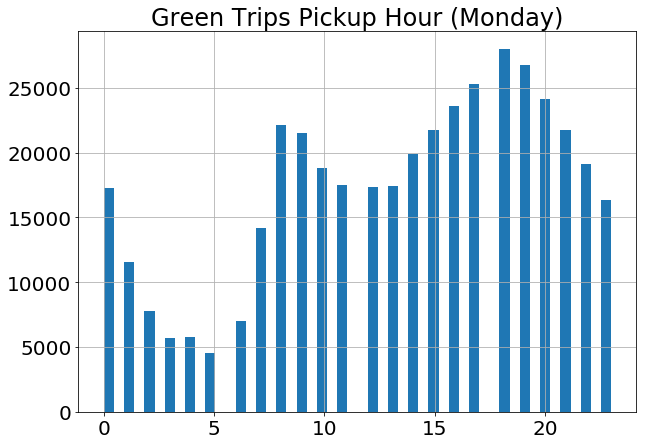

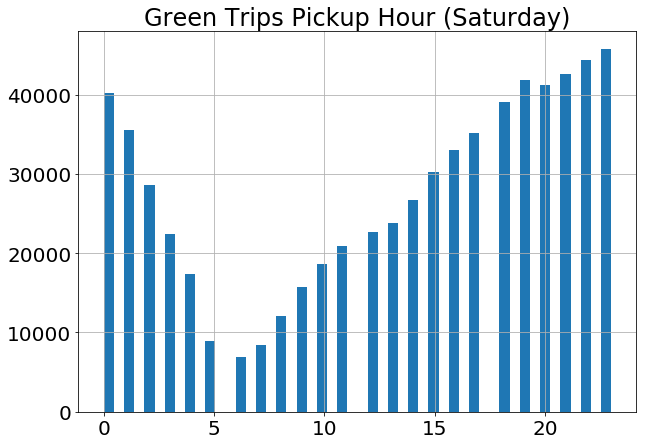

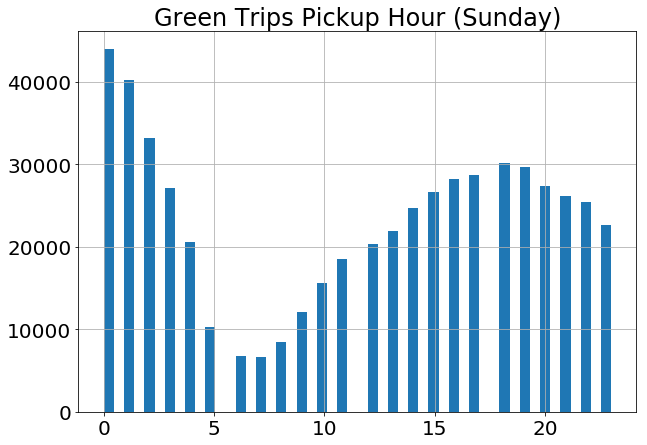

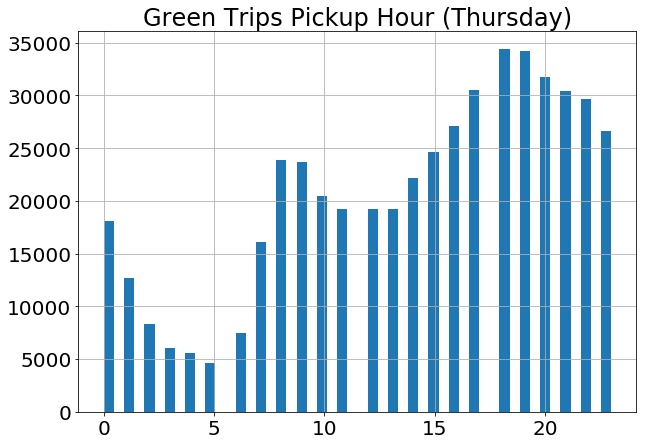

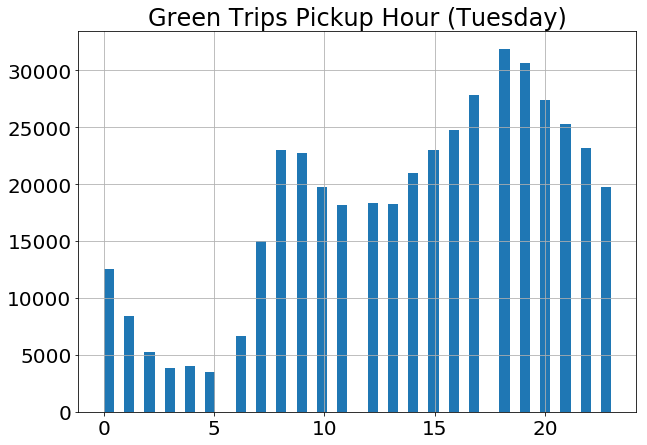

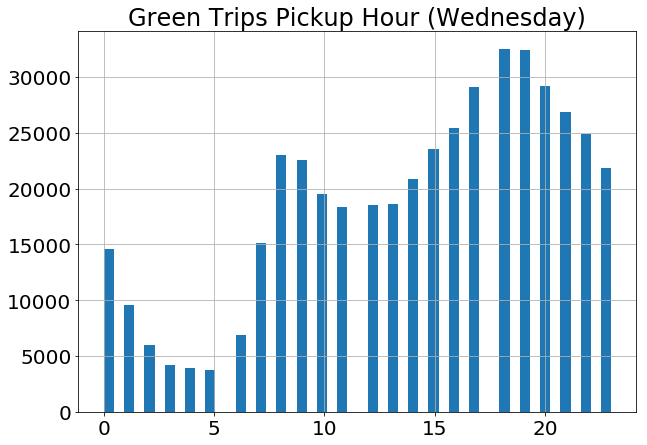

In [13]:
# graficar histograma del pickup time para cada día de la semana
for group in green_trips_groupedby_day:
    green_pickup_day_hours = group[1]["format_pickup_datetime"].dt.hour
    green_pickup_day_hours.hist(bins=50, figsize=(10,7))
    plt.title("Green Trips Pickup Hour " + "(" + group[0] + ")")
    plt.rcParams.update({'font.size': 20})
    plt.show()
    
    

In the analysis of peak hours per day in green service we notice similarities with global behavior, with an increase in activity on Fridays and Saturdays at night and decrease in Sunday night.

## "yellow_trips"

In [16]:
yellow_trips = pd.read_csv("Data/yellow_trips_new.csv")

In [17]:
yellow_trips['format_pickup_datetime'] = pd.to_datetime(yellow_trips['pickup_datetime'])

In [18]:
yellow_trips_pickup_hour = yellow_trips["format_pickup_datetime"].dt.hour

In [19]:
yellow_trips['day_of_week'] = yellow_trips["format_pickup_datetime"].dt.day_name()

In [20]:
yellow_trips_groupedby_day = yellow_trips.groupby("day_of_week")

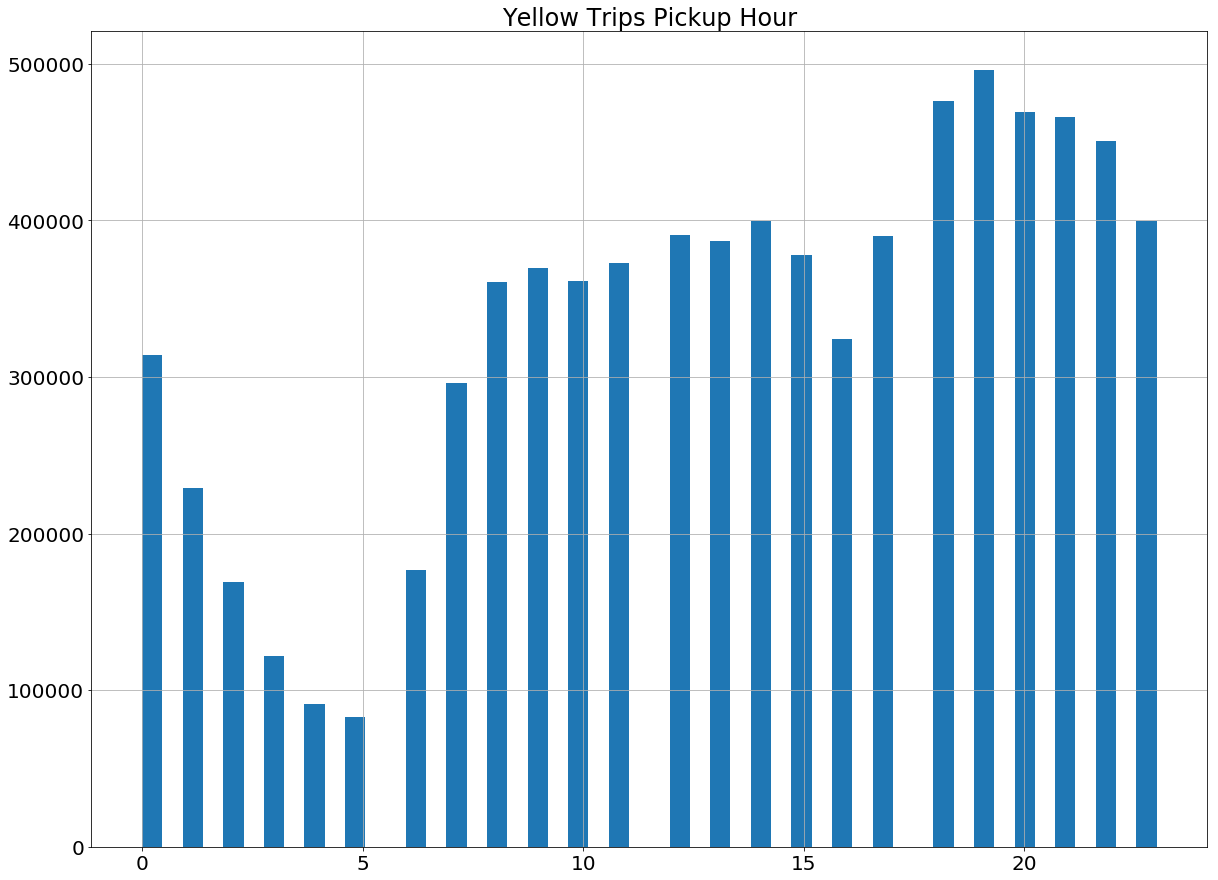

In [22]:
# histograma de las horas del pickup
yellow_trips_pickup_hour.hist(bins=50, figsize=(20,15))
plt.title("Yellow Trips Pickup Hour")
plt.rcParams.update({'font.size': 20})
plt.show()

-Global peak hours in yellow service: 18-19h

-Global valley hours in yellow service: Early in the morning 5h 

Very similar to green service.

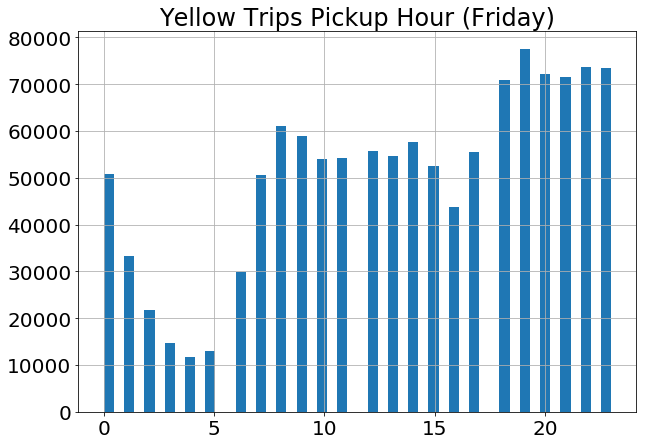

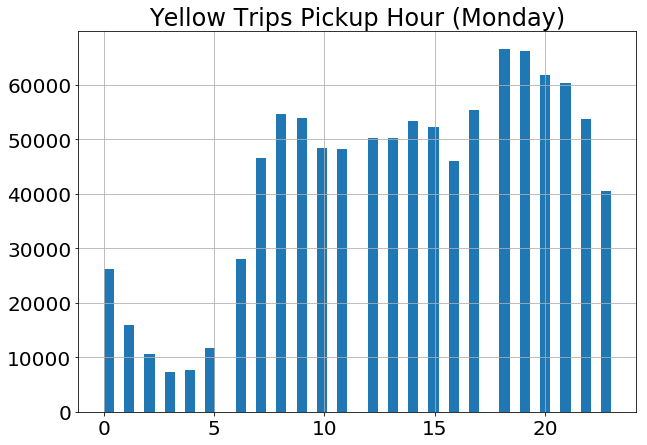

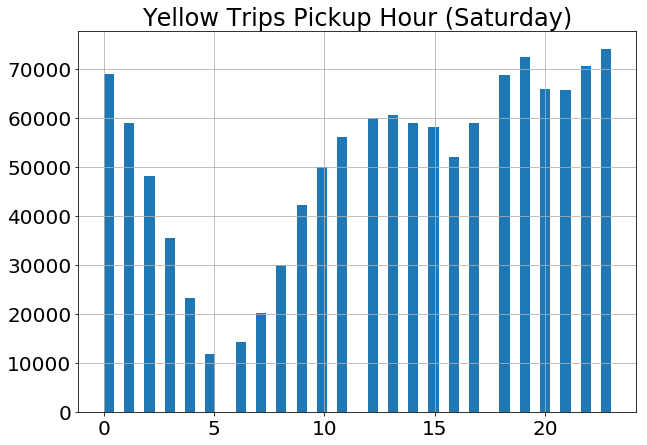

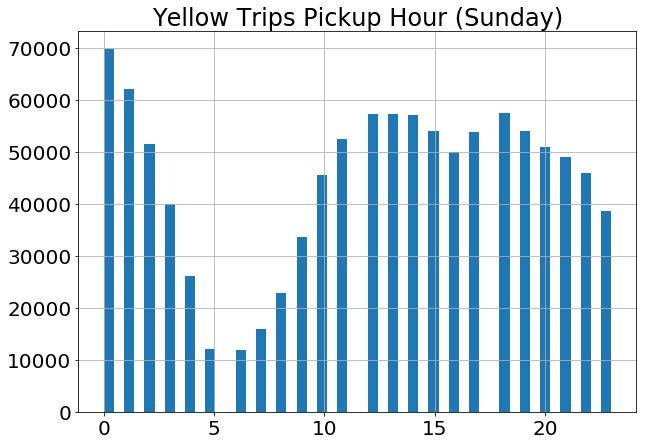

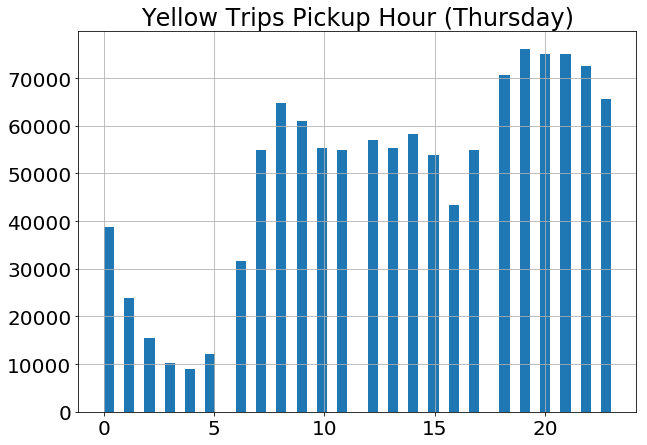

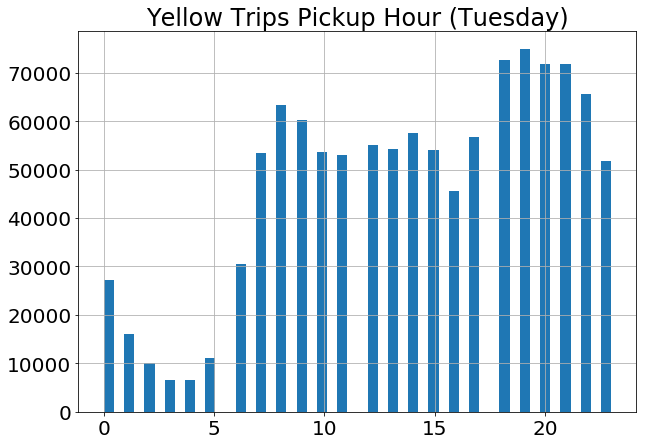

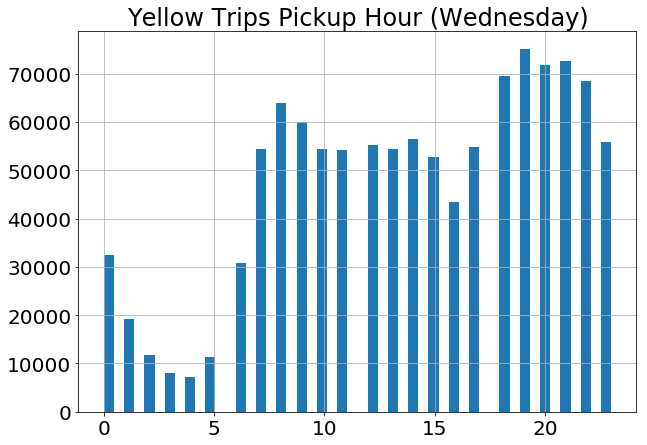

In [21]:
for group in yellow_trips_groupedby_day:
    yellow_pickup_day_hours = group[1]["format_pickup_datetime"].dt.hour
    yellow_pickup_day_hours.hist(bins=50, figsize=(10,7))
    plt.title("Yellow Trips Pickup Hour " + "(" + group[0] + ")")
    plt.rcParams.update({'font.size': 20})
    plt.show()

The yellow service maintains a trend of high activity at night, with greater demand on Fridays and lower demand on Sundays.

# "uber 2014_trips"

In [23]:
uber14_trips = pd.read_csv("Data/uber_nta3_2014.csv")
uber14_trips['format_pickup_datetime'] = pd.to_datetime(uber14_trips['pickup_datetime'])
uber14_trips_pickup_hour = uber14_trips["format_pickup_datetime"].dt.hour
uber14_trips['day_of_week'] = uber14_trips["format_pickup_datetime"].dt.day_name()
uber14_trips_groupedby_day = uber14_trips.groupby("day_of_week")

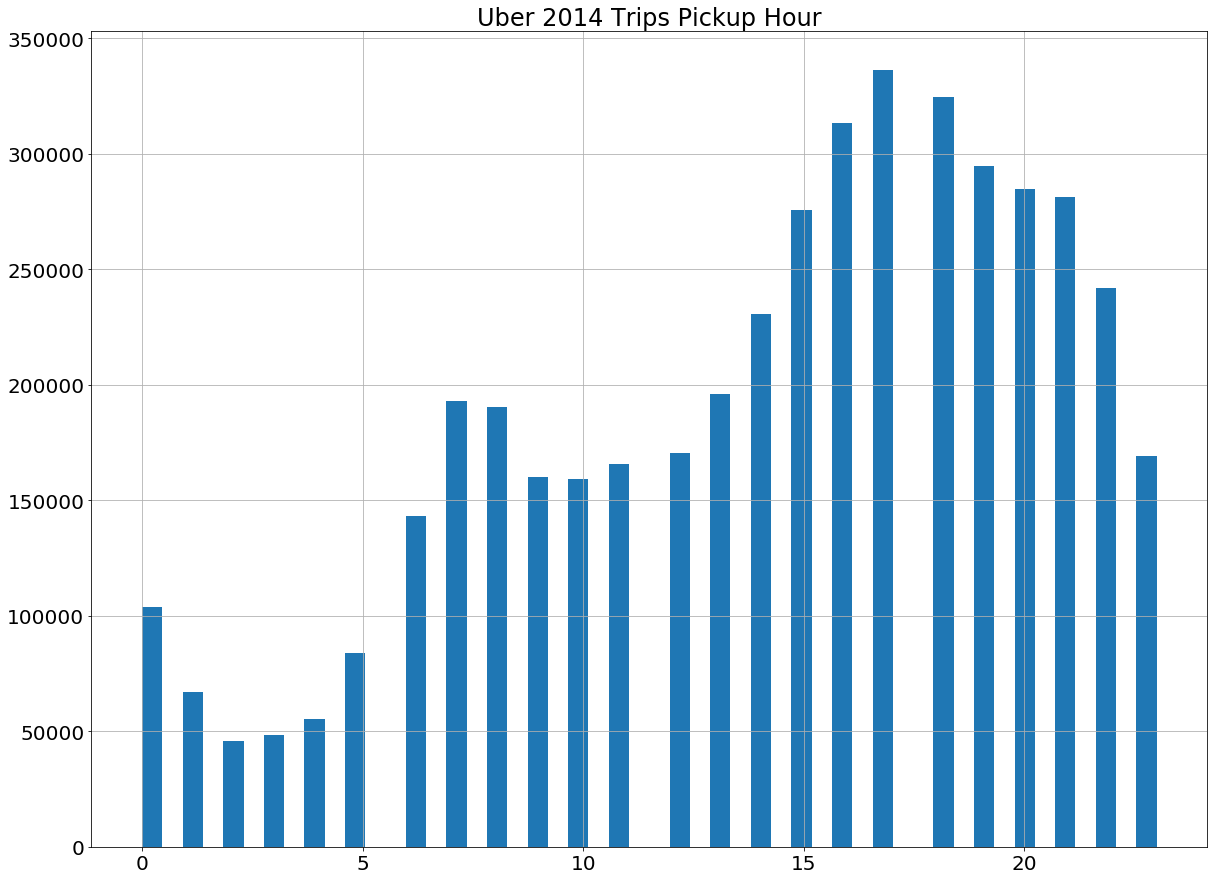

In [24]:
# histograma de las horas del pickup
uber14_trips_pickup_hour.hist(bins=50, figsize=(20,15))
plt.title("Uber 2014 Trips Pickup Hour")
plt.rcParams.update({'font.size': 20})
plt.show()

-Global peak hours in uber service in 2014: 18-19h

-Global valley hours in uber service in 2014: Early in the morning 2h


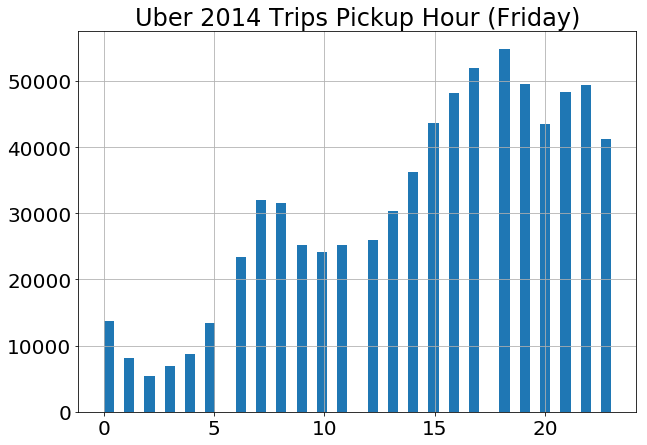

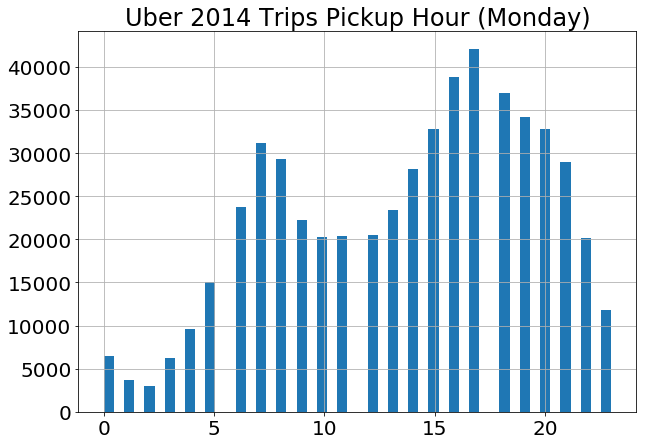

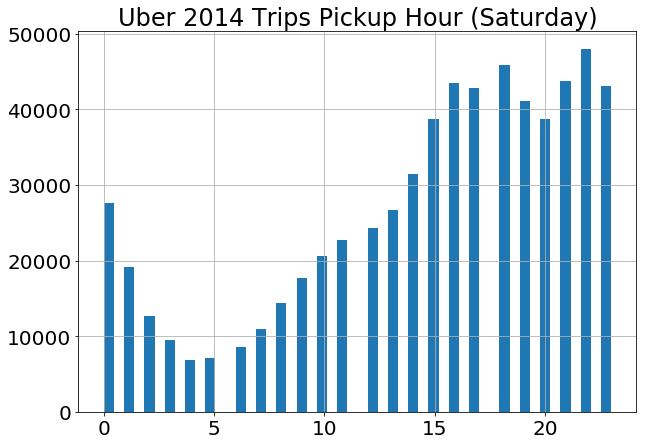

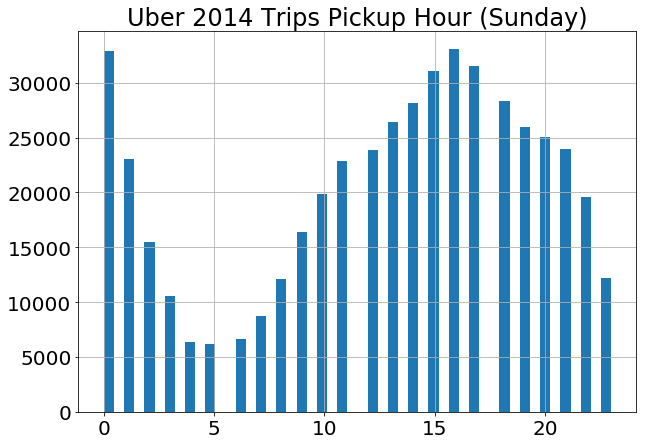

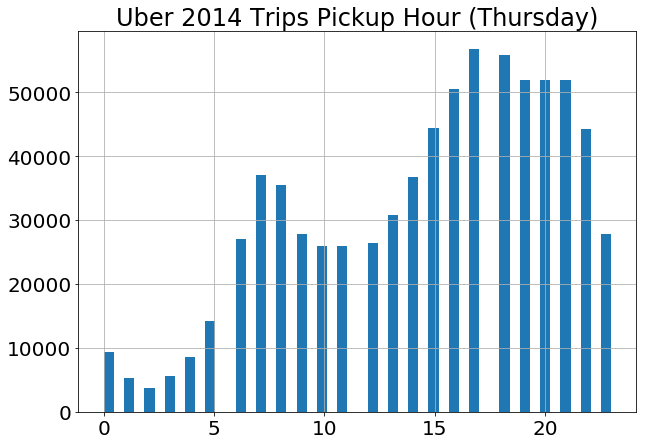

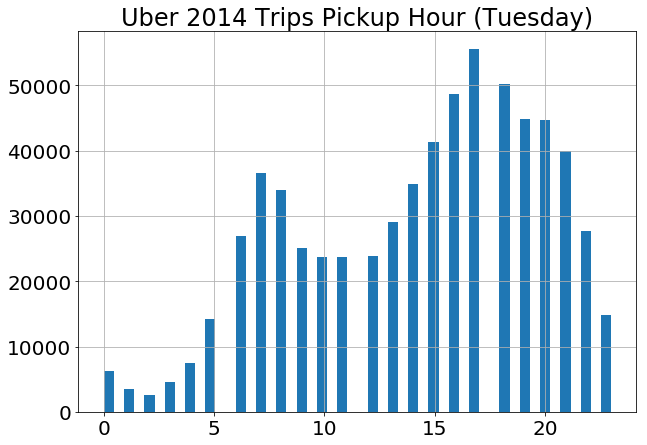

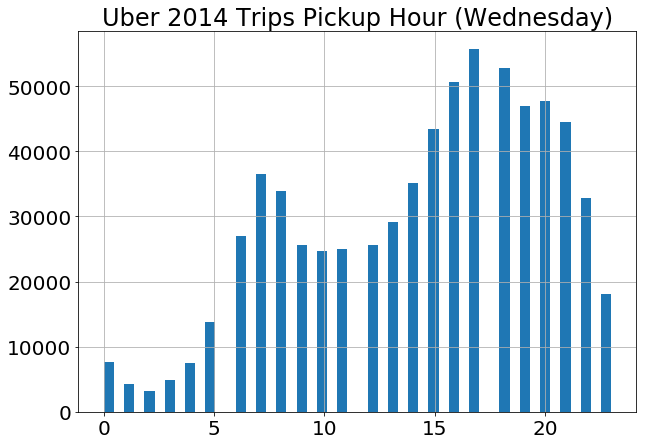

In [30]:
for group in uber14_trips_groupedby_day:
    uber14_pickup_day_hours = group[1]["format_pickup_datetime"].dt.hour
    uber14_pickup_day_hours.hist(bins=50, figsize=(10,7))
    plt.title("Uber 2014 Trips Pickup Hour " + "(" + group[0] + ")")
    plt.rcParams.update({'font.size': 20})
    plt.show()

As in the yellow and green services, weekdays have little demand after midnight and until almost noon, with increased activities at night, especially on Friday.

# "uber 2015_trips"

In [33]:
uber15_trips = pd.read_csv("Data/uber_nta3_2015.csv")
uber15_trips['format_pickup_datetime'] = pd.to_datetime(uber15_trips['pickup_datetime'])
uber15_trips_pickup_hour = uber15_trips["format_pickup_datetime"].dt.hour
uber15_trips['day_of_week'] = uber15_trips["format_pickup_datetime"].dt.day_name()
uber15_trips_groupedby_day = uber15_trips.groupby("day_of_week")

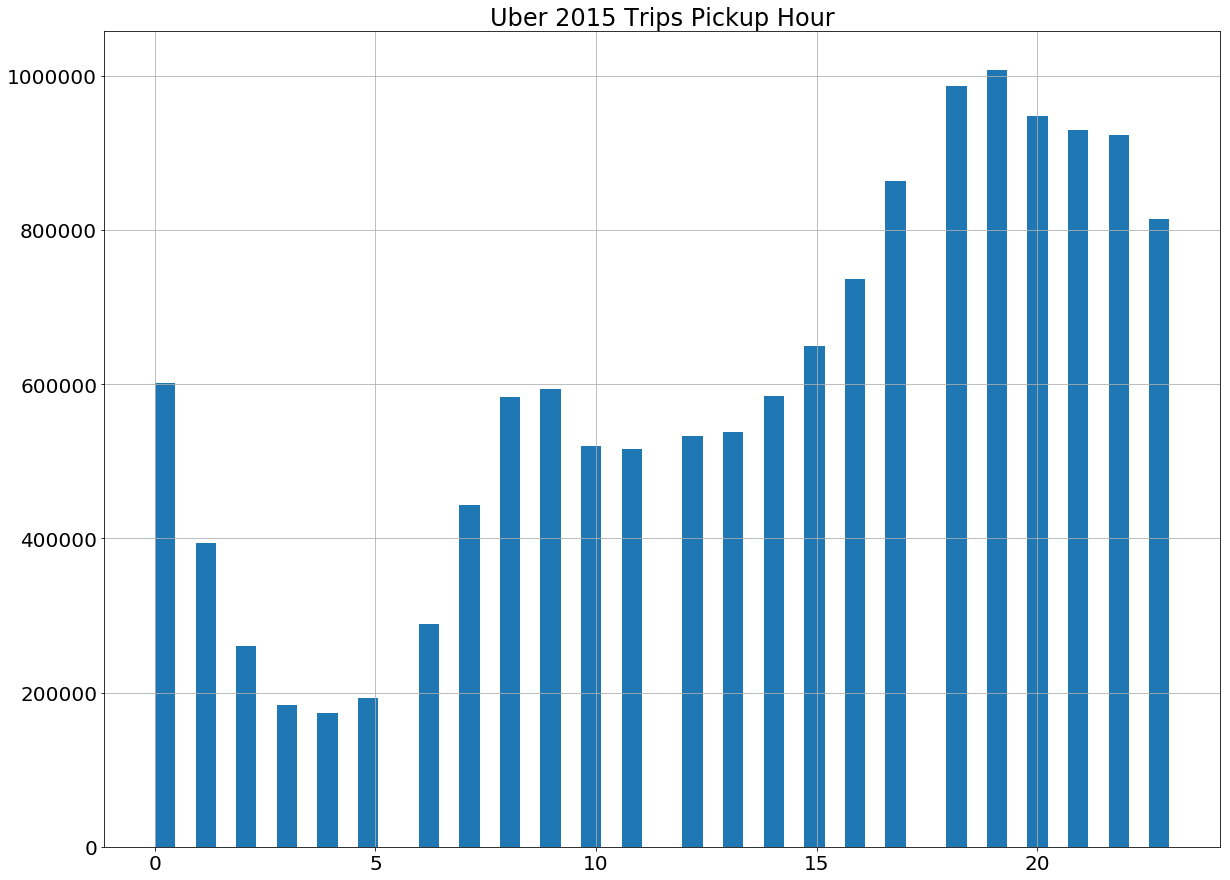

In [34]:
# histograma de las horas del pickup
uber15_trips_pickup_hour.hist(bins=50, figsize=(20,15))
plt.title("Uber 2015 Trips Pickup Hour")
plt.rcParams.update({'font.size': 20})
plt.show()

-Global peak hours in uber service in 2015: 18-19h

-Global valley hours in uber service in 2015: Early in the morning 4h

No surprice, the same behavior of the other services.

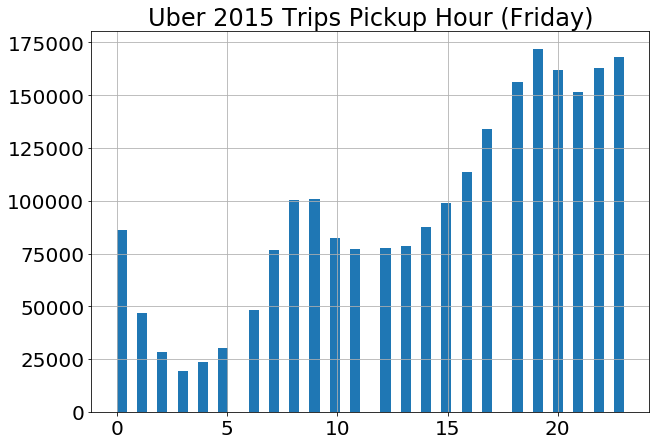

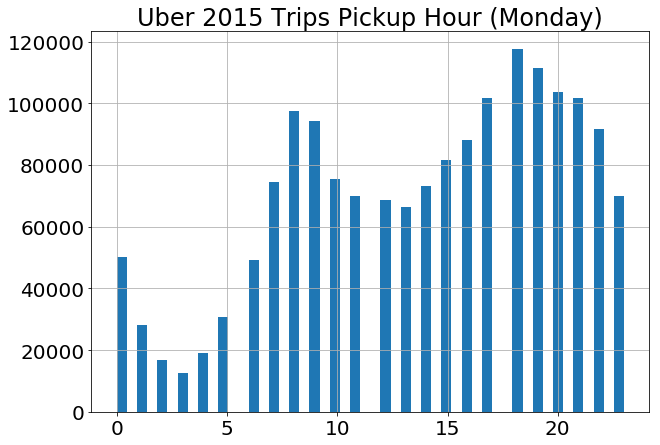

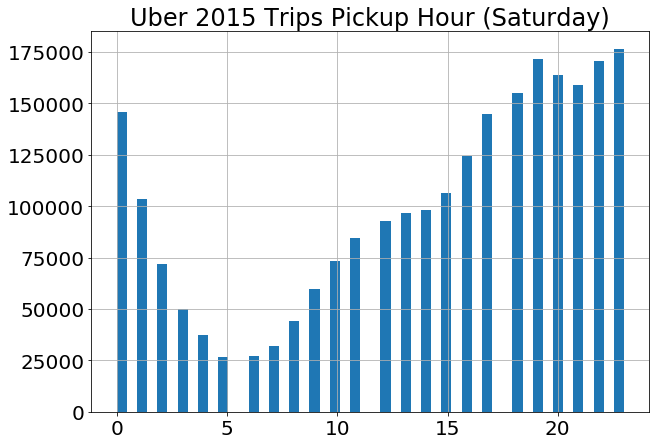

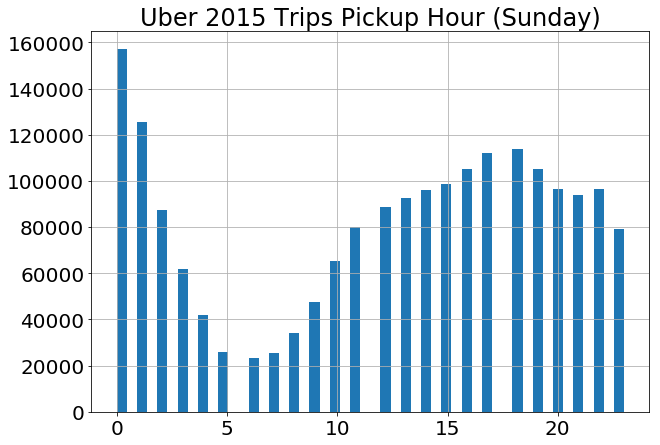

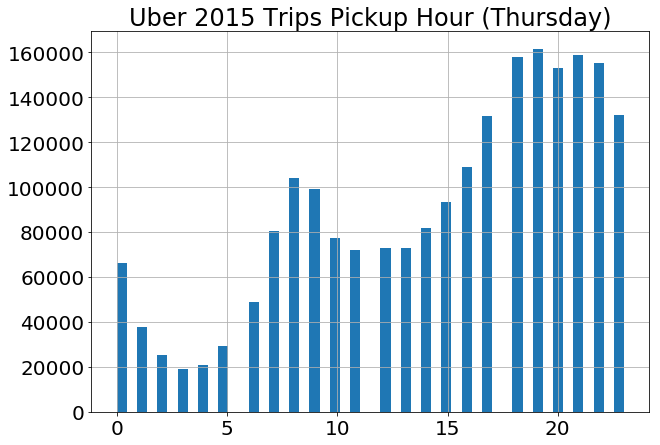

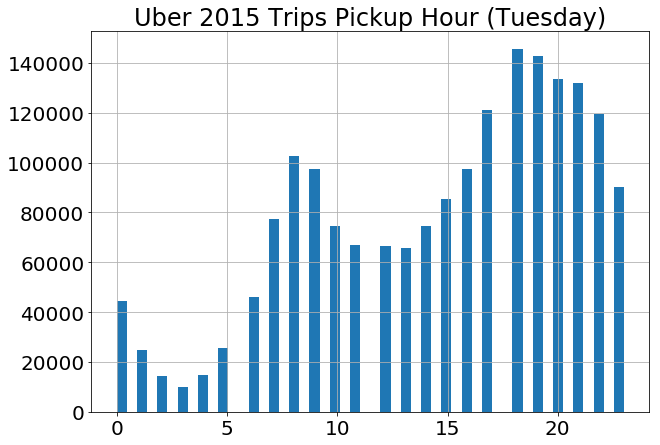

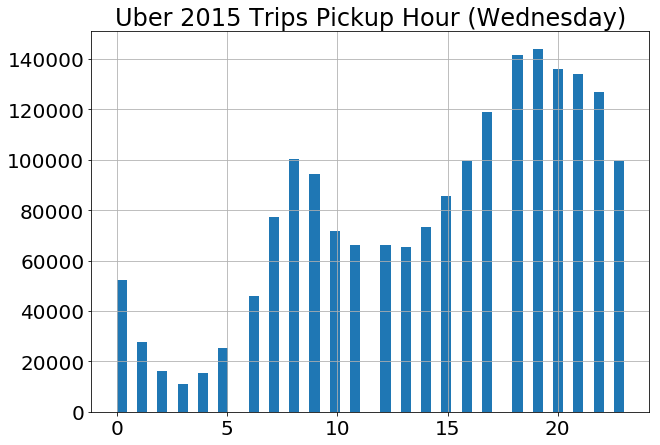

In [36]:
for group in uber15_trips_groupedby_day:
    uber15_pickup_day_hours = group[1]["format_pickup_datetime"].dt.hour
    uber15_pickup_day_hours.hist(bins=50, figsize=(10,7))
    plt.title("Uber 2015 Trips Pickup Hour " + "(" + group[0] + ")")
    plt.rcParams.update({'font.size': 20})
    plt.show()

As in the other datasets, weekdays have little demand after midnight and until almost noon, with increased activities at night, especially on Friday and low activities on Sunday.

We can conclude that the schedules of the users of uber are similar to those of the other services, what is striking is that if we observe the global trend of uber we realize that it passed approximately 350 thousand trips in its peak demand in 2014 to about 1 million in 2015, which doubles the maximum number of trips in yellow service in both years that has about 500 thousand.
This shows uber as a competitor who manages not only to take a large part of the market but also to encourage more people to use the service, which can lead to an increase in the number of cars providing the service and thus congest traffic.